In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


In [2]:
#to do
#remove incomplete assignments

In [3]:
work_log = pd.read_csv("test.csv")
print(work_log.head())
#print(len(work_log))
print(work_log.dtypes)

work_log = work_log[work_log.Date.notnull()]
#print(work_log)

work_log.Date = pd.to_datetime(work_log.Date, format = '%m/%d/%Y')
print(work_log.head())
print(work_log.dtypes)


        Date                   Case    Type I            Type II  \
0  4/21/2016             8021S-844T  Response  Draft Preparation   
1  4/21/2016             8021S-844T  Response  Draft Preparation   
2  4/22/2016              8021L-843   Rewrite  Draft Preparation   
3  4/22/2016  Best Practices Review     Other              Other   
4  4/22/2016  Best Practices Review     Other              Other   

                                               Title    Year  Month  Week  \
0  TOUCH SYSTEM AND METHOD OF DETERMINING LOW-NOI...  2016.0    4.0  17.0   
1  TOUCH SYSTEM AND METHOD OF DETERMINING LOW-NOI...  2016.0    4.0  17.0   
2       DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    4.0  17.0   
3                                                NaN  2016.0    4.0  17.0   
4                                                NaN  2016.0    4.0  17.0   

      Start       End  ...  Sum for Completed Assignment  Comments Weekday  \
0   9:30 AM  12:30 PM  ...                        

     Year  Total Hours
0  2016.0      1380.16
1  2017.0      1443.91
2  2018.0      1419.53
3  2019.0      1246.70
4  2020.0       426.77


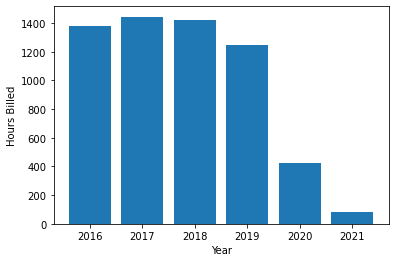

In [38]:
by_year = work_log.groupby('Year')['Total Hours'].sum().reset_index()

print(by_year.head())

plt.bar(by_year.Year, by_year['Total Hours'])
plt.xlabel("Year")
plt.ylabel("Hours Billed")
plt.show()

[5. 6. 2. 3. 4. 1. 7.]
   Day of the Week  Total Hours
0              1.0       466.15
1              2.0      1045.08
2              3.0      1091.75
3              4.0      1121.25
4              5.0      1029.68
5              6.0       881.40
6              7.0       366.69


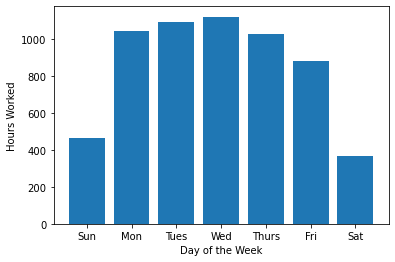

In [4]:
work_log = work_log.rename(columns = {"Weekday": "Day of the Week"})
print(work_log['Day of the Week'].unique())

work_log_by_day = work_log.groupby('Day of the Week', as_index=False)['Total Hours'].sum()
print(work_log_by_day)

plt.bar(work_log_by_day['Day of the Week'], work_log_by_day['Total Hours'])
plt.xlabel("Day of the Week")
plt.ylabel("Hours Worked")
plt.xticks(ticks=work_log_by_day['Day of the Week'], labels=["Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"])
plt.show()

   Day of the Week  Total Hours
0              1.0     3.884583
1              2.0     5.558936
2              3.0     5.598718
3              4.0     5.691624
4              5.0     5.280410
5              6.0     4.638947
6              7.0     4.120112


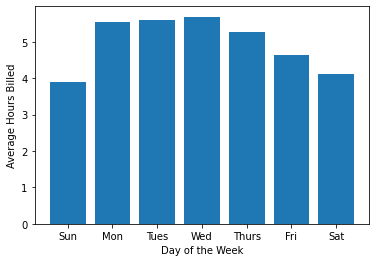

In [34]:
daily_average = work_log.groupby(['Date', 'Day of the Week'])['Total Hours'].sum().reset_index()
#print(daily_average)
daily_average = daily_average.groupby('Day of the Week', as_index=False)['Total Hours'].mean()
print(daily_average)

plt.bar(daily_average['Day of the Week'], daily_average['Total Hours'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Hours Billed")
plt.xticks(ticks=work_log_by_day['Day of the Week'], labels=["Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"])

plt.show()

In [5]:
print(work_log['Type I'].unique())

['Response' 'Rewrite' 'Other' 'Research' 'Drafting' 'NOA'
 'Prospective Client' 'Review Drawings' 'Response II' 'Issue Fee'
 'Design Rewrite' 'POA' 'Restriction Requirement' 'Response III'
 'Notice to File Corrected Application Papers' 'AFCP' 'Nonbillable'
 'New Application' 'Request for Corrected Filing Receipt' 'Response IV'
 'Reissue' 'IDS' 'Examiner-Initiated Interview' 'Drawings'
 'Rewrite (As-Is)' 'RCE' 'Substitute Statement'
 'Notice to File Missing Parts' 'Preliminary Amendment'
 'Decision on Appeal' 'DMCA Counterclaim' '312 Amendment'
 'Submission of Declaration' 'Response to 312'
 'Submission of Priority Document' 'Amazon Infringement Analysis'
 'Infringement Analysis' 'Supplemental NOA' "Examiner's Amendment"
 'Client Inquiry' 'Pre-Appeal Brief' 'Appeal Brief' 'Amended ADS'
 "Examiner's Amendment II" 'Ex Parte Quayle' 'Terminal Disclaimer'
 'Response V' 'AFCP II' 'Notice of Non-Compliant Amendment' 'Response VI'
 'Application Status' 'Supplemental Amendment' 'Advisory Action

                              Case        Type I  Total Hours       Date
0                         2018-CES      Research        13.64 2018-03-29
1  8002A-0 Patent Research Project      Research        12.67 2016-05-02
2                     8021-517 CON      Response        28.53 2016-11-16
3                     8021-517 CON   Response II        15.49 2017-06-07
4                     8021-517 CON  Response III        12.03 2017-11-17
[9.74532894736842, 8.410222222222222, 9.080769230769231]
[152, 45, 13]


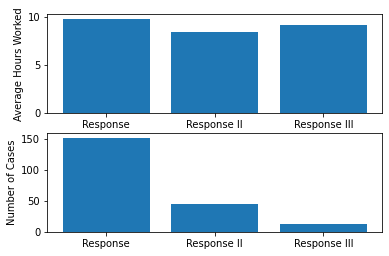

In [6]:
work_log_by_type = work_log.groupby(['Case', 'Type I'], as_index=False).agg(
    {'Total Hours': 'sum',
     'Date': 'max'})

print(work_log_by_type.head())

response_types = ['Response', 'Response II', 'Response III']

response_means = []
response_counts = []

for rt in response_types:
    response_means.append(np.mean(work_log_by_type[work_log_by_type['Type I'] == rt]['Total Hours']))
    response_counts.append(len(work_log_by_type[work_log_by_type['Type I'] == rt]))
    
print(response_means)
print(response_counts)

fig, axs = plt.subplots(2)

axs[0].bar(response_types, response_means)
axs[0].set_ylabel("Average Hours Worked")
axs[1].bar(response_types, response_counts)
axs[1].set_ylabel("Number of Cases")
plt.show()

#plt.subplots(3)


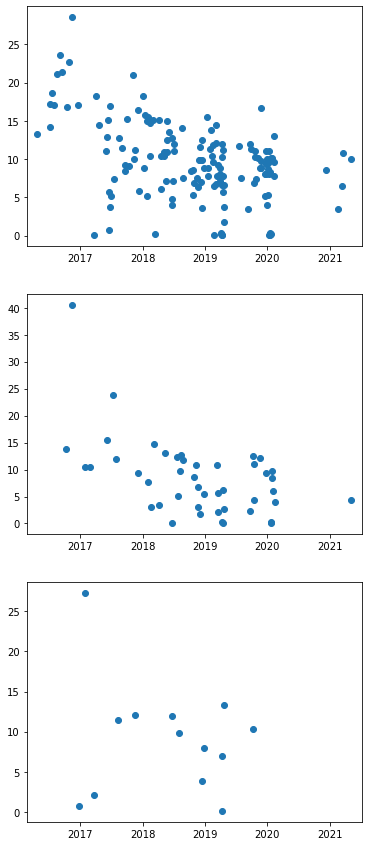

In [7]:
fig, axs = plt.subplots(3)

fig.set_figheight(15)
min_date = np.min(work_log_by_type.Date)
max_date = np.max(work_log_by_type.Date)

for i, rt in enumerate(response_types):
    df = work_log_by_type[work_log_by_type['Type I'] == rt]
    
    axs[i].scatter(x = df.Date, y = df['Total Hours'])
    axs[i].set_xlim(min_date-timedelta(days=60), max_date+timedelta(days=60))


plt.show()


In [8]:
rewrites = work_log[work_log['Type I'] == "Rewrite"]
print(rewrites.head())

rewrites_by_case = rewrites.groupby(['Case'], as_index=False).agg(
    {'Total Hours': 'sum',
     'Date': 'max'})
print(rewrites_by_case)
print(rewrites_by_case.dtypes)
print(np.mean(rewrites_by_case['Total Hours']))

         Date       Case   Type I            Type II  \
2  2016-04-22  8021L-843  Rewrite  Draft Preparation   
13 2016-04-27  8021L-843  Rewrite  Draft Preparation   
26 2016-05-02  8021L-843  Rewrite  Draft Preparation   
29 2016-05-02  8021L-843  Rewrite  Draft Preparation   
30 2016-05-03  8021L-843  Rewrite  Draft Preparation   

                                           Title    Year  Month  Week  \
2   DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    4.0  17.0   
13  DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    4.0  18.0   
26  DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    5.0  19.0   
29  DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    5.0  19.0   
30  DISPLAY APPARATUS AND DRIVING METHOD THEREOF  2016.0    5.0  19.0   

       Start       End  ...  Sum for Completed Assignment  Comments  \
2   11:36 AM  11:59 AM  ...                           NaN       NaN   
13   2:20 PM   6:35 PM  ...                           NaN       NaN   
26   9:06 A

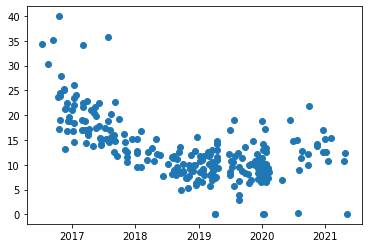

In [9]:
plt.scatter(x = rewrites_by_case.Date, y = rewrites_by_case['Total Hours'])

plt.show()

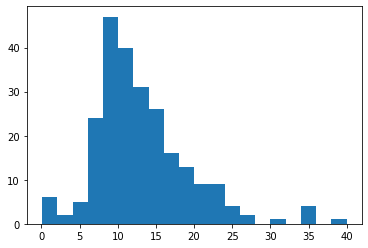

In [10]:
plt.hist(rewrites_by_case['Total Hours'], bins=20)

plt.show()

In [11]:
#Hours worked